In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import reuters

In [16]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)

In [7]:
from tensorflow.keras.preprocessing import sequence

In [29]:
x_train=sequence.pad_sequences(x_train,maxlen=200)

In [9]:
from tensorflow.keras.utils import plot_model,to_categorical

In [18]:
y_train=to_categorical(y_train)

In [30]:
x_train.shape

(8982, 200)

In [19]:
import numpy as np
np.unique(y_train)

array([0., 1.], dtype=float32)

In [20]:
x_train.shape

(8982,)

In [21]:
y_train.shape

(8982, 46)

In [22]:
from tensorflow.keras import models,layers

In [33]:
model=models.Sequential()
model.add(layers.Embedding(10000,64,input_length=200))
model.add(layers.Conv1D(32,10,activation="relu"))
model.add(layers.MaxPooling1D(5))
model.add(layers.LSTM(32,recurrent_dropout=0.1,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

In [34]:
from tensorflow.keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam()
              ,metrics=["categorical_accuracy"])

In [35]:
with tf.device("/gpu:0"):
    history=model.fit(x_train,y_train,epochs=15,batch_size=300,validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/15
7185/7185 [==============================] - 5s 761us/sample - loss: 3.6695 - categorical_accuracy: 0.2264 - val_loss: 2.9028 - val_categorical_accuracy: 0.2220
Epoch 2/15
7185/7185 [==============================] - 3s 459us/sample - loss: 2.6015 - categorical_accuracy: 0.3460 - val_loss: 2.1813 - val_categorical_accuracy: 0.4708
Epoch 3/15
7185/7185 [==============================] - 4s 498us/sample - loss: 2.0385 - categorical_accuracy: 0.4771 - val_loss: 1.8527 - val_categorical_accuracy: 0.5114
Epoch 4/15
7185/7185 [==============================] - 4s 511us/sample - loss: 1.8510 - categorical_accuracy: 0.5074 - val_loss: 1.7683 - val_categorical_accuracy: 0.5181
Epoch 5/15
7185/7185 [==============================] - 4s 527us/sample - loss: 1.7027 - categorical_accuracy: 0.5304 - val_loss: 1.6388 - val_categorical_accuracy: 0.5459
Epoch 6/15
7185/7185 [==============================] - 4s 511us/sample - loss: 1.5472 - cat

In [36]:
model.save("adam_reuters.h5")

In [45]:
word_index=reuters.get_word_index()

In [47]:
reversed_word_index=dict([(key,value) for value,key in word_index.items()])

In [54]:
decoded=[reversed_word_index.get(x) for x in x_train[20]]

In [57]:
from tensorflow.keras import callbacks

In [60]:
logdir="first"
tensorboard=callbacks.TensorBoard(log_dir=logdir)

In [61]:
model_2=models.Sequential()
model_2.add(layers.Embedding(10000,64,input_length=200))
model_2.add(layers.Conv1D(32,7,activation="relu"))
model_2.add(layers.MaxPooling1D(5))
model_2.add(layers.Conv1D(32,10,activation="relu"))
model_2.add(layers.GlobalMaxPool1D())
model_2.add(layers.Dense(46,activation="softmax"))

In [63]:
model_2.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam()
              ,metrics=["categorical_accuracy"])

In [67]:
with tf.device("/gpu:0"):
    history_2=model_2.fit(x_train,y_train,epochs=20,batch_size=300,validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 4s 565us/sample - loss: 3.3247 - categorical_accuracy: 0.3308 - val_loss: 2.5632 - val_categorical_accuracy: 0.3450
Epoch 2/20
7185/7185 [==============================] - 2s 290us/sample - loss: 2.3213 - categorical_accuracy: 0.3646 - val_loss: 2.1046 - val_categorical_accuracy: 0.3595
Epoch 3/20
7185/7185 [==============================] - 2s 293us/sample - loss: 1.9875 - categorical_accuracy: 0.4273 - val_loss: 1.8723 - val_categorical_accuracy: 0.4981
Epoch 4/20
7185/7185 [==============================] - 2s 284us/sample - loss: 1.8020 - categorical_accuracy: 0.5120 - val_loss: 1.7479 - val_categorical_accuracy: 0.5242
Epoch 5/20
7185/7185 [==============================] - 2s 294us/sample - loss: 1.6724 - categorical_accuracy: 0.5304 - val_loss: 1.6645 - val_categorical_accuracy: 0.5376
Epoch 6/20
7185/7185 [==============================] - 2s 294us/sample - loss: 1.5516 - cat

In [68]:
import matplotlib.pyplot as plt

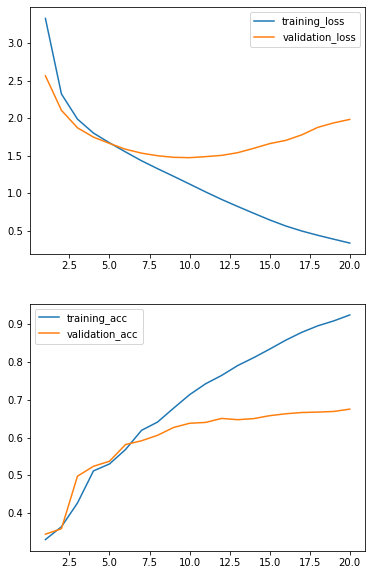

In [70]:
data=history_2.history
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot(range(1,21),data["loss"],label="training_loss")
plt.plot(range(1,21),data["val_loss"],label="validation_loss")
plt.legend()
plt.subplot(2,1,2)
plt.plot(range(1,21),data["categorical_accuracy"],label="training_acc")
plt.plot(range(1,21),data["val_categorical_accuracy"],label="validation_acc")
plt.legend()

# conclusion model_2 overfitted after epoch 9

In [71]:
x_test=sequence.pad_sequences(x_test,maxlen=200)
y_pred=model_2.predict(x_test)